In [2]:
import json
import glob
from PIL import Image, ImageDraw
import pandas as pd
import sys
import os
sys.path.append("/mnt/data/2D-3D-Semantics")
import assets.utils as utils
import numpy as np

In [2]:
ls

Stanford-2D-3D-detectron-set.ipynb  inference_test/           train.py
Untitled.ipynb                      model_0149999.pth
area_json_files/                    output_train_first_test/


In [4]:
areas = glob.glob('area_json_files/*json')

In [5]:
areas

['area_json_files/area_1.json',
 'area_json_files/area_3.json',
 'area_json_files/area_4.json',
 'area_json_files/area_6.json',
 'area_json_files/area_5b.json',
 'area_json_files/area_2.json',
 'area_json_files/area_5a.json']

In [6]:
for area in areas:
    with open(area) as json_file:
        d = json.load(json_file)
        print(area, len(list(d.keys())))

area_json_files/area_1.json 8748
area_json_files/area_3.json 2745
area_json_files/area_4.json 10111
area_json_files/area_6.json 8669
area_json_files/area_5b.json 9049
area_json_files/area_2.json 13442
area_json_files/area_5a.json 5790


In [7]:
8748 + 13442 + 2745 + 10111 + 8669

43715

In [8]:
pwd

'/home/ubuntu/stanford-detectron'

In [24]:
range_img = Image.open('./pcl_mapping/center-point/range_img_test.png')

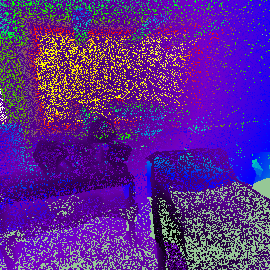

In [25]:
range_img

In [42]:
og_img = Image.open('/mnt/data/2D-3D-Semantics/area_3/data/rgb/camera_249f2e52e27047e987eb7149ea712526_office_6_frame_26_domain_rgb.png')

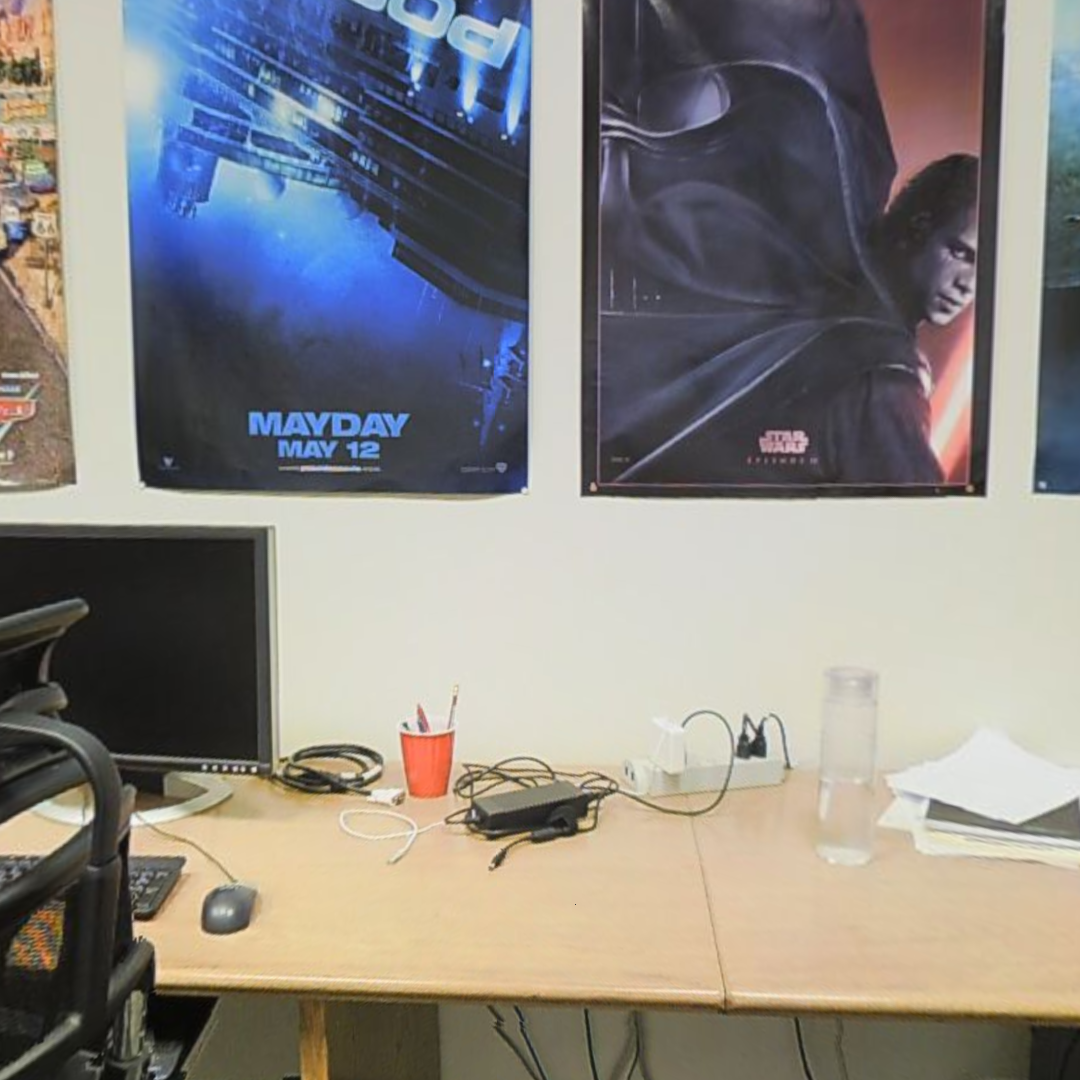

In [43]:
og_img

In [39]:
boxed = ImageDraw.Draw(og_img)

In [40]:
boxed.rectangle([359.8721618652344, 623.5806274414062, 536.9439697265625, 960.7304077148438])
boxed.rectangle([366.3626708984375, 283.8227844238281, 537.0790405273438, 569.6677856445312])
boxed.rectangle([454.2367248535156, 849.2886352539062, 538.9633178710938, 1076.0208740234375])

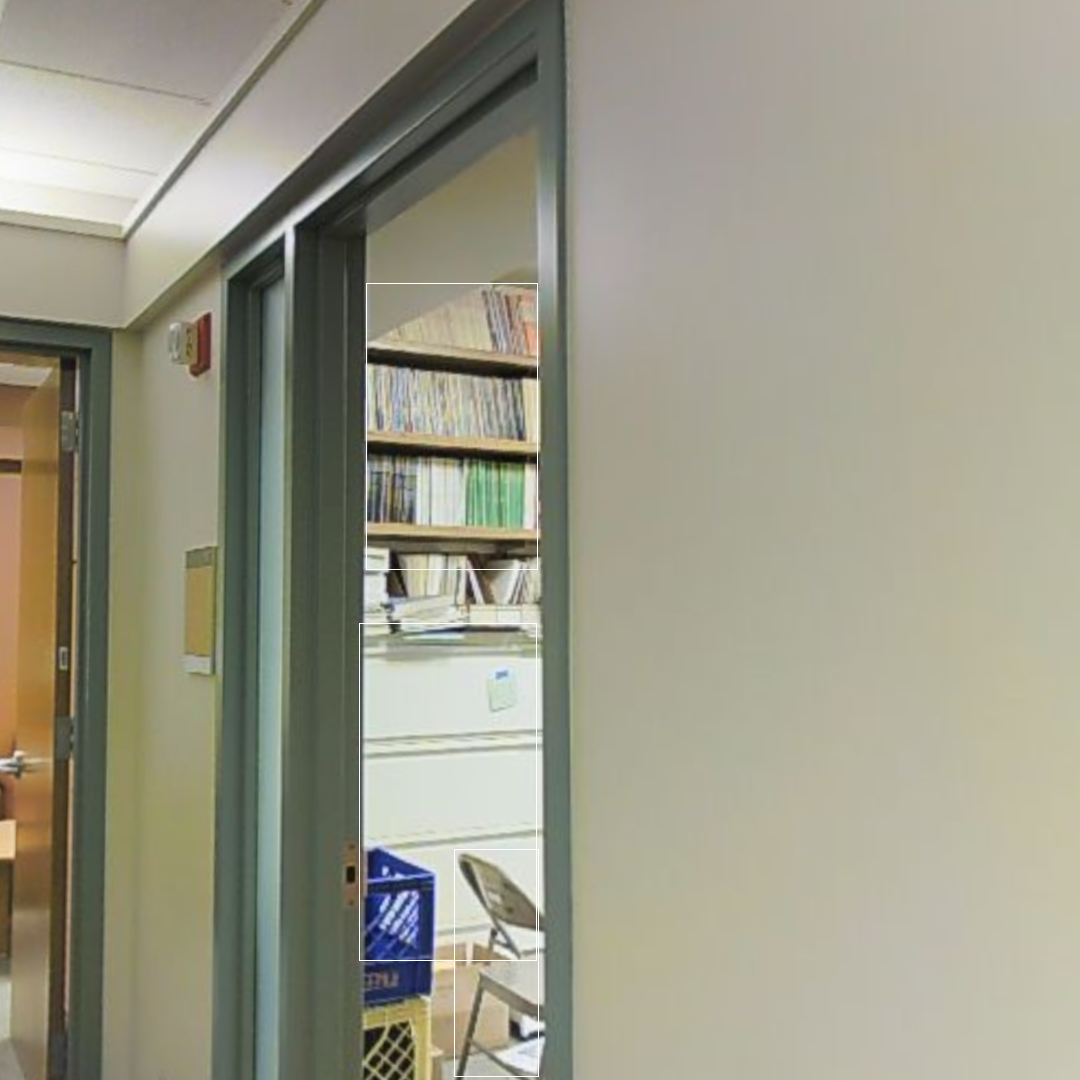

In [41]:
og_img

In [49]:
df = pd.read_csv('/home/ubuntu/stanford-detectron/full_inference/test.csv')

In [50]:
df

2d_Detection_File     Class  Confidence  \
0  camera_4d491624b8dd4db9999935affb0c4ada_hallwa...  bookcase    0.999934   
1  camera_4d491624b8dd4db9999935affb0c4ada_hallwa...  bookcase    0.999806   
2  camera_4d491624b8dd4db9999935affb0c4ada_hallwa...     chair    0.999786   

        x_min       y_min       x_max        y_max        x         y  \
0  359.872162  623.580627  536.943970   960.730408  22.4589  1.024760   
1  366.362671  283.822784  537.079041   569.667786  22.5753  1.231510   
2  454.236725  849.288635  538.963318  1076.020874  22.2471  0.283692   

          z  
0  0.764248  
1  2.054130  
2  0.380640

In [88]:
df['2d_Detection_File'][0]

'camera_4d491624b8dd4db9999935affb0c4ada_hallway_1_frame_3_domain_rgb.txt'

In [3]:
import torch

In [8]:
model = torch.load('out_retinanet_R_101_FPN_3x_4train_lr001/model_0099999.pth')

In [9]:
model

{'model': OrderedDict([('backbone.fpn_lateral3.weight', tensor([[[[-0.0007]],
               
                        [[-0.0130]],
               
                        [[ 0.0011]],
               
                        ...,
               
                        [[ 0.0054]],
               
                        [[ 0.0039]],
               
                        [[ 0.0021]]],
               
               
                       [[[-0.0017]],
               
                        [[-0.0057]],
               
                        [[-0.0009]],
               
                        ...,
               
                        [[-0.0087]],
               
                        [[-0.0005]],
               
                        [[-0.0019]]],
               
               
                       [[[-0.0054]],
               
                        [[ 0.0032]],
               
                        [[ 0.0034]],
               
                        ...,
           

In [10]:
new_model = {}
new_model['model'] = model['model']
new_model['iteration'] = model['iteration']

In [11]:
torch.save(new_model, 'out_retinanet_R_101_FPN_3x_4train_lr001/model_0099999_weights.pth')

In [161]:
new_model = {}

In [77]:
ls out_faster_rcnn_R_101_FPN_3x_1-3-5-6/

events.out.tfevents.1574767917.ip-172-30-3-203.28211.0
last_checkpoint
metrics.json
model_0004999.pth
model_0009999.pth
model_0014999.pth
model_0019999.pth
model_0024999.pth
model_0029999.pth
model_0034999.pth
model_0039999.pth
model_0044999.pth
model_0049999.pth
model_0054999.pth
model_0059999.pth
model_0064999.pth
model_0069999.pth
model_0074999.pth
model_0074999_weights.pth


In [79]:
model.keys()

dict_keys(['model', 'optimizer', 'scheduler', 'iteration'])

In [80]:
sys.path.append("/mnt/data/2D-3D-Semantics")

NameError: name 'sys' is not defined

In [22]:
labels = utils.load_labels('/mnt/data/2D-3D-Semantics/assets/semantic_labels.json')

In [18]:
labels

['<UNK>_0_<UNK>_0_0',
 'beam_10_hallway_6_1',
 'beam_10_storage_4_2',
 'beam_10_office_9_3',
 'beam_10_hallway_2_6',
 'beam_11_hallway_7_1',
 'beam_11_storage_8_2',
 'beam_11_office_10_3',
 'beam_11_hallway_2_6',
 'beam_12_hallway_7_1',
 'beam_12_WC_1_3',
 'beam_12_hallway_2_6',
 'beam_13_hallway_7_1',
 'beam_13_WC_2_3',
 'beam_13_hallway_2_6',
 'beam_14_hallway_7_1',
 'beam_14_hallway_2_6',
 'beam_15_hallway_7_1',
 'beam_15_hallway_2_6',
 'beam_16_hallway_7_1',
 'beam_16_hallway_2_6',
 'beam_17_hallway_7_1',
 'beam_17_hallway_6_6',
 'beam_18_hallway_7_1',
 'beam_18_lounge_1_6',
 'beam_19_office_1_1',
 'beam_19_office_1_6',
 'beam_1_conferenceRoom_1_1',
 'beam_1_conferenceRoom_1_2',
 'beam_1_conferenceRoom_1_3',
 'beam_1_hallway_13_4',
 'beam_1_office_39_5',
 'beam_1_conferenceRoom_1_6',
 'beam_20_office_2_1',
 'beam_20_office_2_6',
 'beam_21_office_3_1',
 'beam_21_office_3_6',
 'beam_22_office_3_1',
 'beam_22_office_4_6',
 'beam_23_office_4_1',
 'beam_23_office_5_6',
 'beam_24_office_

In [19]:
labels[2259]

'chair_48_office_4_3'

In [89]:
sem = Image.open('/mnt/data/2D-3D-Semantics/area_3/data/semantic/camera_4d491624b8dd4db9999935affb0c4ada_hallway_1_frame_3_domain_semantic.png')

In [93]:
np_sem = np.array(sem)

In [95]:
np_sem.shape

(1080, 1080, 3)

In [178]:
(849 + 1076.020874) // 2, (454.236725 + 538.963318) // 2

(962.0, 496.0)

In [179]:
utils.get_index(np_sem[962, 496, :])

2259

In [180]:
utils.parse_label(labels[2259])

{'instance_class': 'chair',
 'instance_num': 48,
 'room_type': 'office',
 'room_num': 4,
 'area_num': 3}

In [181]:
cat /mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_3/office_4/chair_48.txt

22.306913354727342 0.1653831152801779 0.4141256479881513


In [104]:
labels[453]

'bookcase_19_office_4_3'

In [115]:
cat /mnt/data/Stanford3dDataset_v1.2/avg_annots/avg_annots/Area_3/office_4/bookcase_8.txt

23.330531688685024 1.2885825835285853 2.0714150341594744


In [132]:
sorted(glob.glob('/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_3/WC*'))

['/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_3/WC_1',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_3/WC_2']

In [125]:
sorted(glob.glob('/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/*'))

['/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/conferenceRoom_1',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/copyRoom_1',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/hallway_1',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/hallway_2',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/hallway_3',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/hallway_4',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/hallway_5',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/hallway_6',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/lounge_1',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/office_1',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/office_10',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/office_11',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/office_12',
 '/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/office_13',
 '/mnt/data/St

In [126]:
'/mnt/data/Stanford3dDataset_v1.2/avg_annots_json/Area_6/conferenceRoom_1'.split('_')[-2].split('/')[-1]

'conferenceRoom'

In [37]:
for area_num in [6]:
    dirs = glob.glob('/mnt/data/Stanford3dDataset_v1.2/Area_{}/*/Annotations/'.format(area_num))
    objects = {'chair': 0, 'table': 0, 'sofa': 0, 'bookcase': 0, 'board': 0, 'ceiling': 0, 'floor': 0, 'wall': 0, 'beam': 0, 'column': 0, 'window': 0, 'door': 0, 'clutter': 0}

    rooms = {}
    for room in dirs:
        room_type = room.split('_')[-2].split('/')[-1]

        if room_type not in list(rooms.keys()):
            rooms[room_type] = 0

        rooms[room_type] += 1

    room_types = sorted(list(rooms.keys()), key=lambda v: v.upper())
    print(rooms)

    for t in room_types:
        for i in range(1, rooms[t]+1):
            src_room_dir = '/mnt/data/Stanford3dDataset_v1.2/Area_{}/{}_{}/Annotations/'.format(area_num, t, i)
            dest_room_dir = '/mnt/data/Stanford3dDataset_v1.2/Area_{}_json/{}_{}/Annotations/'.format(area_num, t, i)
            object_counts = {}
            #print(room_dir)

            for obj in list(objects.keys()):
                obj_count = len(glob.glob(src_room_dir + obj + '*'))
                #print(obj, obj_count)

                for i in range(1, obj_count+1):
                    original_path = '{}{}_{}.txt'.format(src_room_dir, obj, i)
                    new_path = '{}{}_{}.txt'.format(dest_room_dir, obj, i + objects[obj])
                    os.system('cp {} {}'.format(original_path, new_path))
                    #print('cp {} {}'.format(original_path, new_path))
                objects[obj] += obj_count

{'office': 37, 'conferenceRoom': 1, 'hallway': 6, 'openspace': 1, 'copyRoom': 1, 'lounge': 1, 'pantry': 1}


rooms

In [150]:
sorted(list(rooms.keys()), key=lambda v: v.upper())

['conferenceRoom', 'hallway', 'lounge', 'office', 'storage', 'WC']

In [151]:
sorted(list(rooms.keys()))

['WC', 'conferenceRoom', 'hallway', 'lounge', 'office', 'storage']

In [200]:
with open('/home/ubuntu/stanford-detectron/area_json_files/area_3_partitioned/area_3_train.json') as j:
    d = json.load(j)

In [201]:
len(list(d.keys()))

2433

In [196]:
165 + 147

312

In [199]:
pd.read_csv('/home/ubuntu/stanford-detectron/full_inference/area_3_val_test.csv')

2d_Detection_File     Class  Confidence  \
0     camera_4d491624b8dd4db9999935affb0c4ada_hallwa...  bookcase    0.999934   
1     camera_4d491624b8dd4db9999935affb0c4ada_hallwa...  bookcase    0.999806   
2     camera_4d491624b8dd4db9999935affb0c4ada_hallwa...     chair    0.999786   
3     camera_b4ea4a673c654438b4e0218c74467c49_lounge...     chair    0.999911   
4     camera_b4ea4a673c654438b4e0218c74467c49_lounge...     table    0.999901   
...                                                 ...       ...         ...   
1519  camera_d31195f6b19d422aaae0415bd0ee838a_hallwa...     chair    0.999969   
1520  camera_d31195f6b19d422aaae0415bd0ee838a_hallwa...     chair    0.999954   
1521  camera_d31195f6b19d422aaae0415bd0ee838a_hallwa...     chair    0.999949   
1522  camera_d31195f6b19d422aaae0415bd0ee838a_hallwa...  bookcase    0.999839   
1523  camera_d31195f6b19d422aaae0415bd0ee838a_hallwa...     chair    0.999836   

            x_min       y_min        x_max        y_max         x         y  \
0      359.872162  623.580627   536.943970   960.730408  22.45890  1.024760   
1      366.362671  283.822784   537.079041   569.667786  22.57530  1.231510   
2      454.236725  849.288635   538.963318  1076.020874  22.24710  0.283692   
3      500.347137  811.448792   674.723816   932.269043   7.31175 -7.508770   
4       23.123035  887.927979   745.532166  1079.347900   8.21978 -6.851880   
...           ...         ...          ...          ...       ...       ...   
1519  1029.444946  401.239868  1079.592773   477.577423   7.35305 -7.521760   
1520   662.501221  472.715698   775.419678   626.906860   8.20329 -2.755120   
1521   920.233887  418.268585  1046.572754   533.293152   7.71859 -6.186110   
1522   666.538330  194.731781   745.650635   477.133270  10.06870 -7.925690   
1523   688.343872  402.088867   780.551392   477.377808   9.81618 -7.969170   

             z  
0     0.764248  
1     2.054130  
2     0.380640  
3     0.680815  
4     0.736935  
...        ...  
1519  0.575823  
1520  0.740841  
1521  0.500562  
1522  1.276880  
1523  0.374557  

[1524 rows x 10 columns]

In [10]:
'/mnt/data/Stanford3dDataset_v1.2/Area_{}/conferenceRoom_1/Annotations/'.split('_')[-2].split('/')[-1]

'conferenceRoom'

In [15]:
glob.glob('/mnt/data/Stanford3dDataset_v1.2/Area_3_json/*/Annotations/*')

['/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/wall_119.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/wall_120.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/clutter_235.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/table_27.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/clutter_233.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/table_26.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/clutter_236.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/clutter_241.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/beam_10.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/wall_118.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/chair_63.txt',
 '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/office_9/Annotations/ceiling_

In [23]:
chair = pd.read_csv('/mnt/data/Stanford3dDataset_v1.2/Area_3_json/conferenceRoom_1/Annotations/chair_13.txt', sep=' ', header=None, names=['x','y','z','r','g','b'])

In [24]:
chair.describe()

x            y            z            r            g  \
count  8605.000000  8605.000000  8605.000000  8605.000000  8605.000000   
mean     19.261735     4.678087     0.441530    87.901453    95.768507   
std       0.170345     0.173852     0.247119    35.966690    40.359169   
min      18.883500     4.315500     0.029000     1.000000     0.000000   
25%      19.123500     4.537500     0.337000    61.000000    64.000000   
50%      19.283500     4.657500     0.465000    94.000000   103.000000   
75%      19.398500     4.831500     0.598000   112.000000   128.000000   
max      19.552500     5.037500     0.923000   191.000000   194.000000   

                 b  
count  8605.000000  
mean     80.082743  
std      33.083546  
min       0.000000  
25%      54.000000  
50%      87.000000  
75%     106.000000  
max     180.000000

In [26]:
a = '/mnt/data/Stanford3dDataset_v1.2/Area_3_json/conferenceRoom_1/Annotations/chair_13.txt'

In [28]:
splitted = a.split('/')

In [29]:
splitted

['',
 'mnt',
 'data',
 'Stanford3dDataset_v1.2',
 'Area_3_json',
 'conferenceRoom_1',
 'Annotations',
 'chair_13.txt']

In [30]:
obj = splitted[-1].split('.')[0]

In [31]:
obj

'chair_13'

In [32]:
room = splitted[-3]

In [33]:
room

'conferenceRoom_1'

In [34]:
name = '{}_{}_3'.format(obj, room)

In [35]:
name

'chair_13_conferenceRoom_1_3'

In [36]:
labels.find(name)

AttributeError: 'list' object has no attribute 'find'

In [37]:
labels.index(name)

1486

In [38]:
labels[1486]

'chair_13_conferenceRoom_1_3'

In [25]:
labels[2000:]

['chair_32_office_4_6',
 'chair_330_auditorium_2_2',
 'chair_331_auditorium_2_2',
 'chair_332_auditorium_2_2',
 'chair_333_auditorium_2_2',
 'chair_334_auditorium_2_2',
 'chair_335_auditorium_2_2',
 'chair_336_auditorium_2_2',
 'chair_337_auditorium_2_2',
 'chair_338_auditorium_2_2',
 'chair_339_auditorium_2_2',
 'chair_33_conferenceRoom_2_1',
 'chair_33_auditorium_1_2',
 'chair_33_office_1_3',
 'chair_33_conferenceRoom_2_4',
 'chair_33_conferenceRoom_3_5',
 'chair_33_office_4_6',
 'chair_340_auditorium_2_2',
 'chair_341_auditorium_2_2',
 'chair_342_auditorium_2_2',
 'chair_343_auditorium_2_2',
 'chair_344_auditorium_2_2',
 'chair_345_auditorium_2_2',
 'chair_346_auditorium_2_2',
 'chair_347_auditorium_2_2',
 'chair_348_auditorium_2_2',
 'chair_349_auditorium_2_2',
 'chair_34_conferenceRoom_2_1',
 'chair_34_auditorium_1_2',
 'chair_34_office_1_3',
 'chair_34_conferenceRoom_2_4',
 'chair_34_conferenceRoom_3_5',
 'chair_34_office_4_6',
 'chair_350_auditorium_2_2',
 'chair_351_auditorium_

In [32]:
area_2_obj_list = glob.glob('/mnt/data/Stanford3dDataset_v1.2/Area_6_json/*/Annotations/*')

In [33]:
obj_df_2 = {}

In [35]:
len(area_2_obj_list), i

(1673, 838)

In [34]:
i = 0
for instance in area_2_obj_list:
    splitted = instance.split('/')
    obj = splitted[-1].split('.')[0]
    room = splitted[-3]
    label = '{}_{}_6'.format(obj, room)
    
    instance_frame = pd.read_csv(instance, sep=' ', header=None, names=['x','y','z','r','g','b']).describe()
    obj_df_2[label] = {}
    try:
        obj_df_2[label]['index'] = labels.index(label)
    except ValueError:
        i += 1
        print('index passed: {}'.format(label))
        continue
    obj_df_2[label]['info_df'] = instance_frame.to_dict()

index passed: clutter_361_office_15_6
index passed: wall_152_office_15_6
index passed: wall_150_office_15_6
index passed: clutter_363_office_15_6
index passed: wall_151_office_15_6
index passed: bookcase_32_office_15_6
index passed: table_39_office_15_6
index passed: clutter_362_office_15_6
index passed: clutter_359_office_15_6
index passed: wall_153_office_15_6
index passed: clutter_360_office_15_6
index passed: beam_39_office_15_6
index passed: clutter_365_office_15_6
index passed: floor_25_office_15_6
index passed: ceiling_39_office_15_6
index passed: clutter_364_office_15_6
index passed: clutter_366_office_15_6
index passed: door_70_office_15_6
index passed: clutter_323_office_11_6
index passed: wall_135_office_11_6
index passed: bookcase_27_office_11_6
index passed: clutter_318_office_11_6
index passed: table_33_office_11_6
index passed: floor_21_office_11_6
index passed: clutter_325_office_11_6
index passed: wall_132_office_11_6
index passed: beam_34_office_11_6
index passed: clu

index passed: beam_53_office_29_6
index passed: floor_39_office_29_6
index passed: clutter_542_office_29_6
index passed: ceiling_53_office_29_6
index passed: bookcase_66_office_29_6
index passed: door_84_office_29_6
index passed: clutter_545_office_29_6
index passed: wall_206_office_29_6
index passed: table_75_openspace_1_6
index passed: clutter_672_openspace_1_6
index passed: floor_48_openspace_1_6
index passed: clutter_667_openspace_1_6
index passed: beam_66_openspace_1_6
index passed: wall_243_openspace_1_6
index passed: beam_65_openspace_1_6
index passed: clutter_670_openspace_1_6
index passed: wall_242_openspace_1_6
index passed: clutter_668_openspace_1_6
index passed: ceiling_62_openspace_1_6
index passed: table_74_openspace_1_6
index passed: clutter_666_openspace_1_6
index passed: clutter_673_openspace_1_6
index passed: clutter_669_openspace_1_6
index passed: clutter_671_openspace_1_6
index passed: clutter_309_office_10_6
index passed: bookcase_24_office_10_6
index passed: table

index passed: wall_147_office_14_6
index passed: clutter_351_office_14_6
index passed: clutter_349_office_14_6
index passed: ceiling_38_office_14_6
index passed: clutter_348_office_14_6
index passed: clutter_353_office_14_6
index passed: table_38_office_14_6
index passed: clutter_352_office_14_6
index passed: beam_37_office_14_6
index passed: door_69_office_14_6
index passed: beam_38_office_14_6
index passed: clutter_354_office_14_6
index passed: table_37_office_14_6
index passed: clutter_499_office_26_6
index passed: clutter_494_office_26_6
index passed: bookcase_55_office_26_6
index passed: clutter_493_office_26_6
index passed: door_81_office_26_6
index passed: clutter_496_office_26_6
index passed: table_54_office_26_6
index passed: wall_196_office_26_6
index passed: clutter_498_office_26_6
index passed: bookcase_54_office_26_6
index passed: beam_50_office_26_6
index passed: wall_194_office_26_6
index passed: floor_36_office_26_6
index passed: clutter_495_office_26_6
index passed: wa

index passed: floor_2_copyRoom_1_6
index passed: wall_5_copyRoom_1_6
index passed: clutter_13_copyRoom_1_6
index passed: table_4_copyRoom_1_6
index passed: door_83_office_28_6
index passed: wall_205_office_28_6
index passed: table_57_office_28_6
index passed: table_58_office_28_6
index passed: clutter_535_office_28_6
index passed: beam_52_office_28_6
index passed: clutter_534_office_28_6
index passed: clutter_533_office_28_6
index passed: clutter_528_office_28_6
index passed: ceiling_52_office_28_6
index passed: bookcase_63_office_28_6
index passed: bookcase_62_office_28_6
index passed: clutter_531_office_28_6
index passed: clutter_529_office_28_6
index passed: wall_203_office_28_6
index passed: clutter_532_office_28_6
index passed: clutter_530_office_28_6
index passed: floor_38_office_28_6
index passed: wall_204_office_28_6
index passed: wall_202_office_28_6
index passed: clutter_128_lounge_1_6
index passed: clutter_123_lounge_1_6
index passed: clutter_122_lounge_1_6
index passed: bea

In [18]:
obj_df_2

{'clutter_329_office_15_1': {'index': 4147,
  'info_df': {'x': {'count': 8688.0,
    'mean': -7.811631215469614,
    'std': 0.7156146367455285,
    'min': -9.077,
    '25%': -8.425,
    '50%': -7.8115000000000006,
    '75%': -7.19,
    'max': -6.562},
   'y': {'count': 8688.0,
    'mean': 10.673326772559852,
    'std': 0.08564422226165386,
    'min': 10.549,
    '25%': 10.586,
    '50%': 10.668,
    '75%': 10.752,
    'max': 10.82},
   'z': {'count': 8688.0,
    'mean': 2.3027883287292816,
    'std': 0.019937746258254528,
    'min': 2.28,
    '25%': 2.291,
    '50%': 2.2935,
    '75%': 2.31,
    'max': 2.375},
   'r': {'count': 8688.0,
    'mean': 107.75771178637201,
    'std': 57.51972548009853,
    'min': 44.0,
    '25%': 71.0,
    '50%': 78.0,
    '75%': 138.0,
    'max': 255.0},
   'g': {'count': 8688.0,
    'mean': 103.70004604051566,
    'std': 58.48568721943313,
    'min': 36.0,
    '25%': 65.0,
    '50%': 74.0,
    '75%': 134.0,
    'max': 255.0},
   'b': {'count': 8688.0,
    

In [42]:
print(instance_frame)

                 x            y            z            r            g  \
count  1342.000000  1342.000000  1342.000000  1342.000000  1342.000000   
mean     23.378142    -5.752299     0.357724    82.043219    80.532787   
std       0.071706     0.037277     0.161245    57.347011    56.513836   
min      23.232000    -5.811000     0.021000     4.000000     5.000000   
25%      23.316000    -5.773000     0.219250    28.000000    27.000000   
50%      23.370000    -5.760000     0.361000    71.500000    71.000000   
75%      23.442000    -5.749000     0.525000   133.000000   131.000000   
max      23.522000    -5.604000     0.558000   255.000000   255.000000   

                 b  
count  1342.000000  
mean     72.396423  
std      52.172655  
min       1.000000  
25%      25.000000  
50%      63.000000  
75%     115.000000  
max     255.000000  


In [43]:
labels[2281]

'chair_4_conferenceRoom_1_3'

In [44]:
pwd

'/home/ubuntu/stanford-detectron'

In [27]:
with open('/mnt/data/Stanford3dDataset_v1.2/area_5_object_info.json', 'w') as f:
    json.dump(obj_df_2, f)

In [46]:
instance_frame

x            y            z            r            g  \
count  1342.000000  1342.000000  1342.000000  1342.000000  1342.000000   
mean     23.378142    -5.752299     0.357724    82.043219    80.532787   
std       0.071706     0.037277     0.161245    57.347011    56.513836   
min      23.232000    -5.811000     0.021000     4.000000     5.000000   
25%      23.316000    -5.773000     0.219250    28.000000    27.000000   
50%      23.370000    -5.760000     0.361000    71.500000    71.000000   
75%      23.442000    -5.749000     0.525000   133.000000   131.000000   
max      23.522000    -5.604000     0.558000   255.000000   255.000000   

                 b  
count  1342.000000  
mean     72.396423  
std      52.172655  
min       1.000000  
25%      25.000000  
50%      63.000000  
75%     115.000000  
max     255.000000

In [47]:
instance_frame.to_json()

'{"x":{"count":1342.0,"mean":23.3781423249,"std":0.0717058985,"min":23.232,"25%":23.316,"50%":23.37,"75%":23.442,"max":23.522},"y":{"count":1342.0,"mean":-5.7522988077,"std":0.0372769146,"min":-5.811,"25%":-5.773,"50%":-5.76,"75%":-5.749,"max":-5.604},"z":{"count":1342.0,"mean":0.3577235469,"std":0.161244712,"min":0.021,"25%":0.21925,"50%":0.361,"75%":0.525,"max":0.558},"r":{"count":1342.0,"mean":82.043219076,"std":57.3470113574,"min":4.0,"25%":28.0,"50%":71.5,"75%":133.0,"max":255.0},"g":{"count":1342.0,"mean":80.5327868852,"std":56.5138356046,"min":5.0,"25%":27.0,"50%":71.0,"75%":131.0,"max":255.0},"b":{"count":1342.0,"mean":72.3964232489,"std":52.172654793,"min":1.0,"25%":25.0,"50%":63.0,"75%":115.0,"max":255.0}}'

In [57]:
ls

Stanford-2D-3D-detectron-set.ipynb
Untitled.ipynb
area_json_files/
full_inference/
inference_test/
model_0149999.pth
out_faster_rcnn_R_101_FPN_3x_1-3-5-6/
out_faster_rcnn_R_101_FPN_3x_1-3-5-6_lr0002/
out_faster_rcnn_R_101_FPN_3x_1-3-5-6_lr002/
out_faster_rcnn_R_101_FPN_3x_1-3-5-6_part2/
out_faster_rcnn_R_101_FPN_3x_2train_lr002/
out_lr_test/
out_retinanet_R_101_FPN_3x_2train_lr0001/
out_retinanet_R_101_FPN_3x_2train_lr001/
out_retinanet_R_101_FPN_3x_2train_lr01/
output_train_1-2-3-4-6/
output_train_1-3-5-6/
output_train_1-3-5-6_lr_0001/
output_train_1-3-5-6asd/
output_train_1-3-5-6temp/
pcl_mapping/
train.py


In [3]:
with open('/mnt/data/Stanford3dDataset_v1.2/area_1_object_info.json') as f:
    area_1_info = json.load(f)
    
with open('/mnt/data/Stanford3dDataset_v1.2/area_2_object_info.json') as f:
    area_2_info = json.load(f)

with open('/mnt/data/Stanford3dDataset_v1.2/area_3_object_info.json') as f:
    area_3_info = json.load(f)

with open('/mnt/data/Stanford3dDataset_v1.2/area_4_object_info.json') as f:
    area_4_info = json.load(f)

In [7]:
area_4_info

{'clutter_499_office_15_4': {'index': 5110,
  'info_df': {'x': {'count': 2727.0,
    'mean': -24.544563623028967,
    'std': 0.1730316498169421,
    'min': -24.865,
    '25%': -24.693,
    '50%': -24.542,
    '75%': -24.402,
    'max': -24.138},
   'y': {'count': 2727.0,
    'mean': -1.013130913091309,
    'std': 0.009297761704676498,
    'min': -1.044,
    '25%': -1.02,
    '50%': -1.015,
    '75%': -1.009,
    'max': -0.974},
   'z': {'count': 2727.0,
    'mean': 1.0403615694902824,
    'std': 0.13839836317846335,
    'min': 0.807,
    '25%': 0.918,
    '50%': 1.039,
    '75%': 1.164,
    'max': 1.271},
   'r': {'count': 2727.0,
    'mean': 74.15988265493216,
    'std': 72.23348638837078,
    'min': 13.0,
    '25%': 26.0,
    '50%': 30.0,
    '75%': 121.0,
    'max': 255.0},
   'g': {'count': 2727.0,
    'mean': 71.14961496149616,
    'std': 66.48412052613332,
    'min': 15.0,
    '25%': 27.0,
    '50%': 31.0,
    '75%': 109.0,
    'max': 242.0},
   'b': {'count': 2727.0,
    'mean':

In [8]:
def calculate_dist(x, y, z):
    return np.sqrt((x**2) + (y**2) + (z**2))

def calculate_area_avg_dists(area_info_dict):
    avg_dists = {}
    obj_types = ['table', 'chair', 'sofa', 'bookcase', 'board']

    for obj_type in obj_types:
        dists = []
        for obj in list(area_3_info.keys()):
            if obj.split('_')[0] == obj_type:
                df = area_3_info[obj]['info_df']
                x = df['x']['max'] - df['x']['min']
                y = df['y']['max'] - df['y']['min']
                z = df['z']['max'] - df['z']['min']
                dists.append(calculate_dist(x, y, z))
        avg_dists[obj_type] = np.array(dists).mean()
    return avg_dists

In [9]:
area_1_avg = calculate_area_avg_dists(area_1_info)
area_2_avg = calculate_area_avg_dists(area_2_info)
area_3_avg = calculate_area_avg_dists(area_3_info)
area_4_avg = calculate_area_avg_dists(area_4_info)

In [117]:
len(list(area_3_info.keys()))

1702

In [103]:
len(dists)

12

In [104]:
np.array(dists).mean()

2.2689402037590916

In [119]:
avg_dists #TRY 3M THRESHOLD

{'table': 1.9392749324163499,
 'chair': 1.166763909525501,
 'sofa': 1.6311379573298561,
 'bookcase': 2.6612634998069953,
 'board': 2.870201559649837}

In [133]:
with open('area_json_files/area_2_partitioned/area2_train.json') as f:
    area2_train = json.load(f)

In [50]:
with open('area_json_files/area_4.json') as f:
    area4 = json.load(f)

In [139]:
len(list(area2_train.keys()))

12442

In [52]:
len(list(area4.keys()))

10111

In [142]:
1000 / 12442 * 8748

703.1023951133258

In [143]:
8748000 / 12442

703.1023951133259

In [51]:
area4

{'camera_273de56ff6c04919a07c33e4d5778fdd_office_5_frame_5_domain_rgb.png': {'file_name': 'camera_273de56ff6c04919a07c33e4d5778fdd_office_5_frame_5_domain_rgb.png',
  'height': 1080,
  'width': 1080,
  'objects': {'0': {'bbox': [0, 0, 448, 459], 'category_id': 3},
   '1': {'bbox': [415, 851, 749, 1079], 'category_id': 1},
   '2': {'bbox': [0, 727, 594, 1079], 'category_id': 0}}},
 'camera_e3c724af04214a8283c05341e5ac3368_lobby_2_frame_14_domain_rgb.png': {'file_name': 'camera_e3c724af04214a8283c05341e5ac3368_lobby_2_frame_14_domain_rgb.png',
  'height': 1080,
  'width': 1080,
  'objects': {'0': {'bbox': [282, 290, 413, 522], 'category_id': 1},
   '1': {'bbox': [305, 253, 410, 441], 'category_id': 1},
   '2': {'bbox': [337, 271, 503, 477], 'category_id': 1},
   '3': {'bbox': [292, 221, 346, 301], 'category_id': 1},
   '4': {'bbox': [549, 351, 578, 538], 'category_id': 1},
   '5': {'bbox': [1044, 394, 1079, 554], 'category_id': 0}}},
 'camera_d3953b1c7b8c421ab7abd79a09e2eb2d_office_4_fra

In [53]:
area4_train_keys = list(area4.keys())[:-1000]
area4_test_keys = list(area4.keys())[-1000:]

In [54]:
len(area4_train_keys), len(area4_test_keys)

(9111, 1000)

In [55]:
area4_train = {}
area4_test = {}

In [56]:
for key in area4_train_keys:
    area4_train[key] = area4[key]

for key in area4_test_keys:
    area4_test[key] = area4[key]

In [57]:
len(list(area4_test.keys()))

1000

In [58]:
area4_train

{'camera_273de56ff6c04919a07c33e4d5778fdd_office_5_frame_5_domain_rgb.png': {'file_name': 'camera_273de56ff6c04919a07c33e4d5778fdd_office_5_frame_5_domain_rgb.png',
  'height': 1080,
  'width': 1080,
  'objects': {'0': {'bbox': [0, 0, 448, 459], 'category_id': 3},
   '1': {'bbox': [415, 851, 749, 1079], 'category_id': 1},
   '2': {'bbox': [0, 727, 594, 1079], 'category_id': 0}}},
 'camera_e3c724af04214a8283c05341e5ac3368_lobby_2_frame_14_domain_rgb.png': {'file_name': 'camera_e3c724af04214a8283c05341e5ac3368_lobby_2_frame_14_domain_rgb.png',
  'height': 1080,
  'width': 1080,
  'objects': {'0': {'bbox': [282, 290, 413, 522], 'category_id': 1},
   '1': {'bbox': [305, 253, 410, 441], 'category_id': 1},
   '2': {'bbox': [337, 271, 503, 477], 'category_id': 1},
   '3': {'bbox': [292, 221, 346, 301], 'category_id': 1},
   '4': {'bbox': [549, 351, 578, 538], 'category_id': 1},
   '5': {'bbox': [1044, 394, 1079, 554], 'category_id': 0}}},
 'camera_d3953b1c7b8c421ab7abd79a09e2eb2d_office_4_fra

In [59]:
with open('area_json_files/area_1_partitioned/area_4_train.json','w') as f:
    json.dump(area4_train, f)
    
with open('area_json_files/area_1_partitioned/area_4_test.json','w') as f:
    json.dump(area4_test, f)

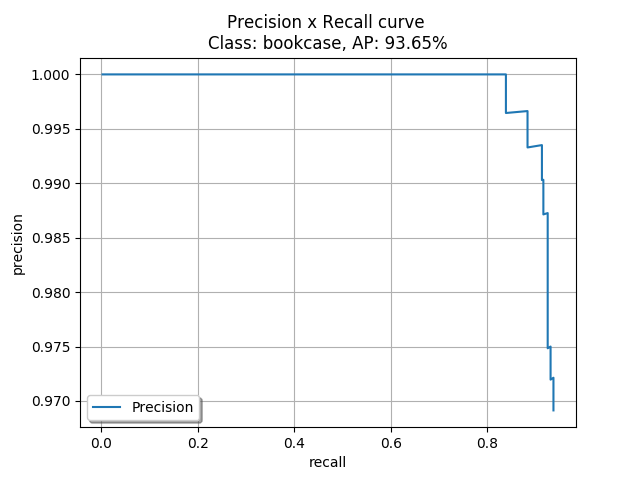

In [42]:
Image.open('inference_test/Object-Detection-Metrics/tests/test_3_parts/plots/bookcase.png')